In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import rand

In [3]:
bold = np.loadtxt('../data/50003_timeseries.txt')
bold_bin = np.zeros(bold.shape)
bold_bin[np.where(bold>=0)] = 1
bold_bin[np.where(bold<0)] = -1

In [4]:
n_rois = bold_bin.shape[1]
n_timesteps = bold_bin.shape[0]
beta = 1
J = np.zeros((n_rois, n_rois))

In [5]:
fc = 1/n_timesteps * bold_bin.T @ bold_bin

In [7]:
class IsingSimulation:
    
    def __init__(self, n_rois, beta, coupling_mat = False, J=None):
        self.N = n_rois
        self.beta = beta
        if not coupling_mat:
            J = np.random.uniform(0, 1, size=(n_rois, n_rois))
            J = (J + J.T)/2 # making it symmetric
            np.fill_diagonal(J, 1)
        self.J = J
        self.state = 2*np.random.randint(2, size=(n_rois))-1
        return


    def step(self, update_state = True, state = None):
        if update_state:
            state = self.state[:]
        for i in range(self.N):
            # calculating delH
            H_i = 0
            H_i = self.J[i, :] @ state.T 
            H_i -= self.J[i, i] * state[i] # removing self coupling term
            cost = 2 * H_i
            if cost < 0:
                state[i] *= -1
            elif rand() < np.exp(-cost*self.beta):
                state[i] *= -1
        if update_state:
            self.state = state
        return state
    
    def calcEnergy(self):
        H = 0
        H = -self.state @ self.J @ self.state.T
        return H/2
    
    def calcMag(self):
        mag = np.sum(self.state)
        return mag
    
    def getTimeseries(self, n_timesteps):
        time_series = np.zeros((n_timesteps, self.N))
        state = self.state[:]
        for i in range(n_timesteps):
            state = self.step(False, state)
            time_series[i] = state
        fc = 1/n_timesteps * time_series.T @ time_series 
        return time_series, fc

In [9]:
eqSteps = 100000     #  number of MC sweeps for equilibration
# mcSteps = 2**9       #  number of MC sweeps for calculation

In [10]:
E = []
# for T in np.linspace(1.53, 3.28, 2):
beta = 1
sim = IsingSimulation(n_rois, beta, coupling_mat = True, J=fc)
n_timesteps = 116
E1 = M1 = E2 = M2 = 0
M = []
corr = []
for i in range(eqSteps):         # equilibrate
    if i%1000 == 0:
        print(i)
        time_series, sim_fc = sim.getTimeseries(n_timesteps)
        c = np.corrcoef(np.triu(fc).flatten(), np.triu(sim_fc).flatten())[0, 1]
        corr.append(c)
    sim.step()           # Monte Carlo moves
    E.append(sim.calcEnergy())
    M.append(sim.calcMag())
plt.plot(corr)

0
1000
2000
3000
4000
5000
6000
7000
8000


KeyboardInterrupt: 

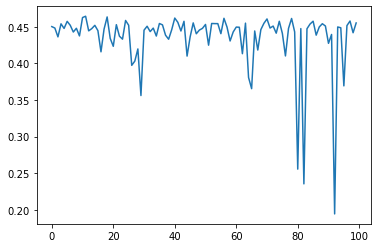

In [100]:
plt.plot(corr)

In [90]:
np.triu(fc).flatten().shape, np.triu(sim_fc).flatten().shape

((13456,), (13456,))

array([1.96, 0.36, 0.28, ..., 0.  , 0.  , 1.96])